In [32]:
import datetime
import dateutil.utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [33]:
raw_data = pd.read_csv("../Dataset/credit_card_transaction_flow.csv")
raw_data.describe()
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         50000 non-null  int64  
 1   Name                50000 non-null  object 
 2   Surname             50000 non-null  object 
 3   Gender              44953 non-null  object 
 4   Birthdate           50000 non-null  object 
 5   Transaction Amount  50000 non-null  float64
 6   Date                50000 non-null  object 
 7   Merchant Name       50000 non-null  object 
 8   Category            50000 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 3.4+ MB


In [34]:
raw_data.head(10)

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
0,752858,Sean,Rodriguez,F,20-10-2002,35.47,03-04-2023,Smith-Russell,Cosmetic
1,26381,Michelle,Phelps,NaN,24-10-1985,2552.72,17-07-2023,"Peck, Spence and Young",Travel
2,305449,Jacob,Williams,M,25-10-1981,115.97,20-09-2023,Steele Inc,Clothing
3,988259,Nathan,Snyder,M,26-10-1977,11.31,11-01-2023,"Wilson, Wilson and Russell",Cosmetic
4,764762,Crystal,Knapp,F,02-11-1951,62.21,13-06-2023,Palmer-Hinton,Electronics
5,576539,Monica,Bartlett,F,20-10-2001,99.14,24-08-2023,"Tran, Torres and Joyce",Cosmetic
6,124681,Thomas,Shaw,NaN,26-10-1976,145.94,30-08-2023,"Evans, Griffin and Torres",Cosmetic
7,521807,Kelsey,Pena,F,28-10-1968,161.39,08-02-2023,Miller PLC,Cosmetic
8,504238,Denise,Porter,M,31-10-1957,77.73,12-01-2023,Jackson-Morgan,Restaurant
9,583532,Alexander,Richardson,F,27-10-1974,142.85,07-06-2023,"Blake, Mays and Anderson",Clothing


In [35]:
raw_data.isnull().sum()

Customer ID              0
Name                     0
Surname                  0
Gender                5047
Birthdate                0
Transaction Amount       0
Date                     0
Merchant Name            0
Category                 0
dtype: int64

In [36]:
raw_data.fillna('OTHERS',inplace=True)
raw_data

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
0,752858,Sean,Rodriguez,F,20-10-2002,35.47,03-04-2023,Smith-Russell,Cosmetic
1,26381,Michelle,Phelps,OTHERS,24-10-1985,2552.72,17-07-2023,"Peck, Spence and Young",Travel
2,305449,Jacob,Williams,M,25-10-1981,115.97,20-09-2023,Steele Inc,Clothing
3,988259,Nathan,Snyder,M,26-10-1977,11.31,11-01-2023,"Wilson, Wilson and Russell",Cosmetic
4,764762,Crystal,Knapp,F,02-11-1951,62.21,13-06-2023,Palmer-Hinton,Electronics
...,...,...,...,...,...,...,...,...,...
49995,891845,Christine,Leach,F,21-10-1997,108.74,30-08-2023,Alexander Ltd,Market
49996,800560,Anna,Allen,F,21-10-1999,133.66,03-05-2023,Knapp-Calhoun,Cosmetic
49997,133285,Nicole,Franklin,M,26-10-1979,464.29,12-02-2023,"Cantrell, Haynes and Ballard",Market
49998,616122,Maria,Keller,M,25-10-1981,472.57,25-03-2023,"Wilson, Jackson and Beard",Market


In [37]:
transection_data = raw_data

In [38]:
transection_data

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
0,752858,Sean,Rodriguez,F,20-10-2002,35.47,03-04-2023,Smith-Russell,Cosmetic
1,26381,Michelle,Phelps,OTHERS,24-10-1985,2552.72,17-07-2023,"Peck, Spence and Young",Travel
2,305449,Jacob,Williams,M,25-10-1981,115.97,20-09-2023,Steele Inc,Clothing
3,988259,Nathan,Snyder,M,26-10-1977,11.31,11-01-2023,"Wilson, Wilson and Russell",Cosmetic
4,764762,Crystal,Knapp,F,02-11-1951,62.21,13-06-2023,Palmer-Hinton,Electronics
...,...,...,...,...,...,...,...,...,...
49995,891845,Christine,Leach,F,21-10-1997,108.74,30-08-2023,Alexander Ltd,Market
49996,800560,Anna,Allen,F,21-10-1999,133.66,03-05-2023,Knapp-Calhoun,Cosmetic
49997,133285,Nicole,Franklin,M,26-10-1979,464.29,12-02-2023,"Cantrell, Haynes and Ballard",Market
49998,616122,Maria,Keller,M,25-10-1981,472.57,25-03-2023,"Wilson, Jackson and Beard",Market


In [39]:
def calculate_age(birthday):
    today = datetime.today()
    age = today.year - birthday.year - ((today.month, today.day) < (birthday.month, birthday.day))
    return age

In [40]:
transection_data["Birthdate"] = pd.to_datetime(transection_data["Birthdate"],dayfirst=True)
transection_data

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,03-04-2023,Smith-Russell,Cosmetic
1,26381,Michelle,Phelps,OTHERS,1985-10-24,2552.72,17-07-2023,"Peck, Spence and Young",Travel
2,305449,Jacob,Williams,M,1981-10-25,115.97,20-09-2023,Steele Inc,Clothing
3,988259,Nathan,Snyder,M,1977-10-26,11.31,11-01-2023,"Wilson, Wilson and Russell",Cosmetic
4,764762,Crystal,Knapp,F,1951-11-02,62.21,13-06-2023,Palmer-Hinton,Electronics
...,...,...,...,...,...,...,...,...,...
49995,891845,Christine,Leach,F,1997-10-21,108.74,30-08-2023,Alexander Ltd,Market
49996,800560,Anna,Allen,F,1999-10-21,133.66,03-05-2023,Knapp-Calhoun,Cosmetic
49997,133285,Nicole,Franklin,M,1979-10-26,464.29,12-02-2023,"Cantrell, Haynes and Ballard",Market
49998,616122,Maria,Keller,M,1981-10-25,472.57,25-03-2023,"Wilson, Jackson and Beard",Market


In [41]:
transection_data["Age"] = transection_data["Birthdate"].apply(calculate_age)

In [42]:
transection_data

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category,Age
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,03-04-2023,Smith-Russell,Cosmetic,21
1,26381,Michelle,Phelps,OTHERS,1985-10-24,2552.72,17-07-2023,"Peck, Spence and Young",Travel,38
2,305449,Jacob,Williams,M,1981-10-25,115.97,20-09-2023,Steele Inc,Clothing,42
3,988259,Nathan,Snyder,M,1977-10-26,11.31,11-01-2023,"Wilson, Wilson and Russell",Cosmetic,46
4,764762,Crystal,Knapp,F,1951-11-02,62.21,13-06-2023,Palmer-Hinton,Electronics,72
...,...,...,...,...,...,...,...,...,...,...
49995,891845,Christine,Leach,F,1997-10-21,108.74,30-08-2023,Alexander Ltd,Market,26
49996,800560,Anna,Allen,F,1999-10-21,133.66,03-05-2023,Knapp-Calhoun,Cosmetic,24
49997,133285,Nicole,Franklin,M,1979-10-26,464.29,12-02-2023,"Cantrell, Haynes and Ballard",Market,44
49998,616122,Maria,Keller,M,1981-10-25,472.57,25-03-2023,"Wilson, Jackson and Beard",Market,42


In [43]:
transection_data.drop(['Name','Surname'],axis=1,inplace=True)

In [44]:
transection_data['Customer ID'].unique().size

50000

In [45]:
transection_data["Date"] = pd.to_datetime(transection_data["Date"],dayfirst=True)

In [46]:
transection_data['Year'] = transection_data['Date'].dt.year
transection_data['Month'] = transection_data['Date'].dt.month
transection_data['DayOfWeek'] = transection_data['Date'].dt.dayofweek

In [47]:
transection_data.rename({'Transaction Amount':'Total Amount'},axis='columns',inplace=True)

In [48]:
transection_data


,Customer ID,Gender,Birthdate,Total Amount,Date,Merchant Name,Category,Age,Year,Month,DayOfWeek
0,752858,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic,21,2023,4,0
1,26381,OTHERS,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel,38,2023,7,0
2,305449,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing,42,2023,9,2
3,988259,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic,46,2023,1,2
4,764762,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics,72,2023,6,1
...,...,...,...,...,...,...,...,...,...,...,...
49995,891845,F,1997-10-21,108.74,2023-08-30,Alexander Ltd,Market,26,2023,8,2
49996,800560,F,1999-10-21,133.66,2023-05-03,Knapp-Calhoun,Cosmetic,24,2023,5,2
49997,133285,M,1979-10-26,464.29,2023-02-12,"Cantrell, Haynes and Ballard",Market,44,2023,2,6
49998,616122,M,1981-10-25,472.57,2023-03-25,"Wilson, Jackson and Beard",Market,42,2023,3,5


In [49]:
transection_data["Category"].unique()

array(['Cosmetic', 'Travel', 'Clothing', 'Electronics', 'Restaurant',
       'Market'], dtype=object)

In [50]:
transection_data["Category"].unique()
average_spending_by_group = transection_data.groupby(['Gender','Month','Category','Age'])['Total Amount'].mean().reset_index()
average_spending_by_group

array(['Cosmetic', 'Travel', 'Clothing', 'Electronics', 'Restaurant',
       'Market'], dtype=object)

In [52]:
average_spending_by_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9571 entries, 0 to 9570
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gender        9571 non-null   object 
 1   Month         9571 non-null   int32  
 2   Category      9571 non-null   object 
 3   Age           9571 non-null   int64  
 4   Total Amount  9571 non-null   float64
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 336.6+ KB


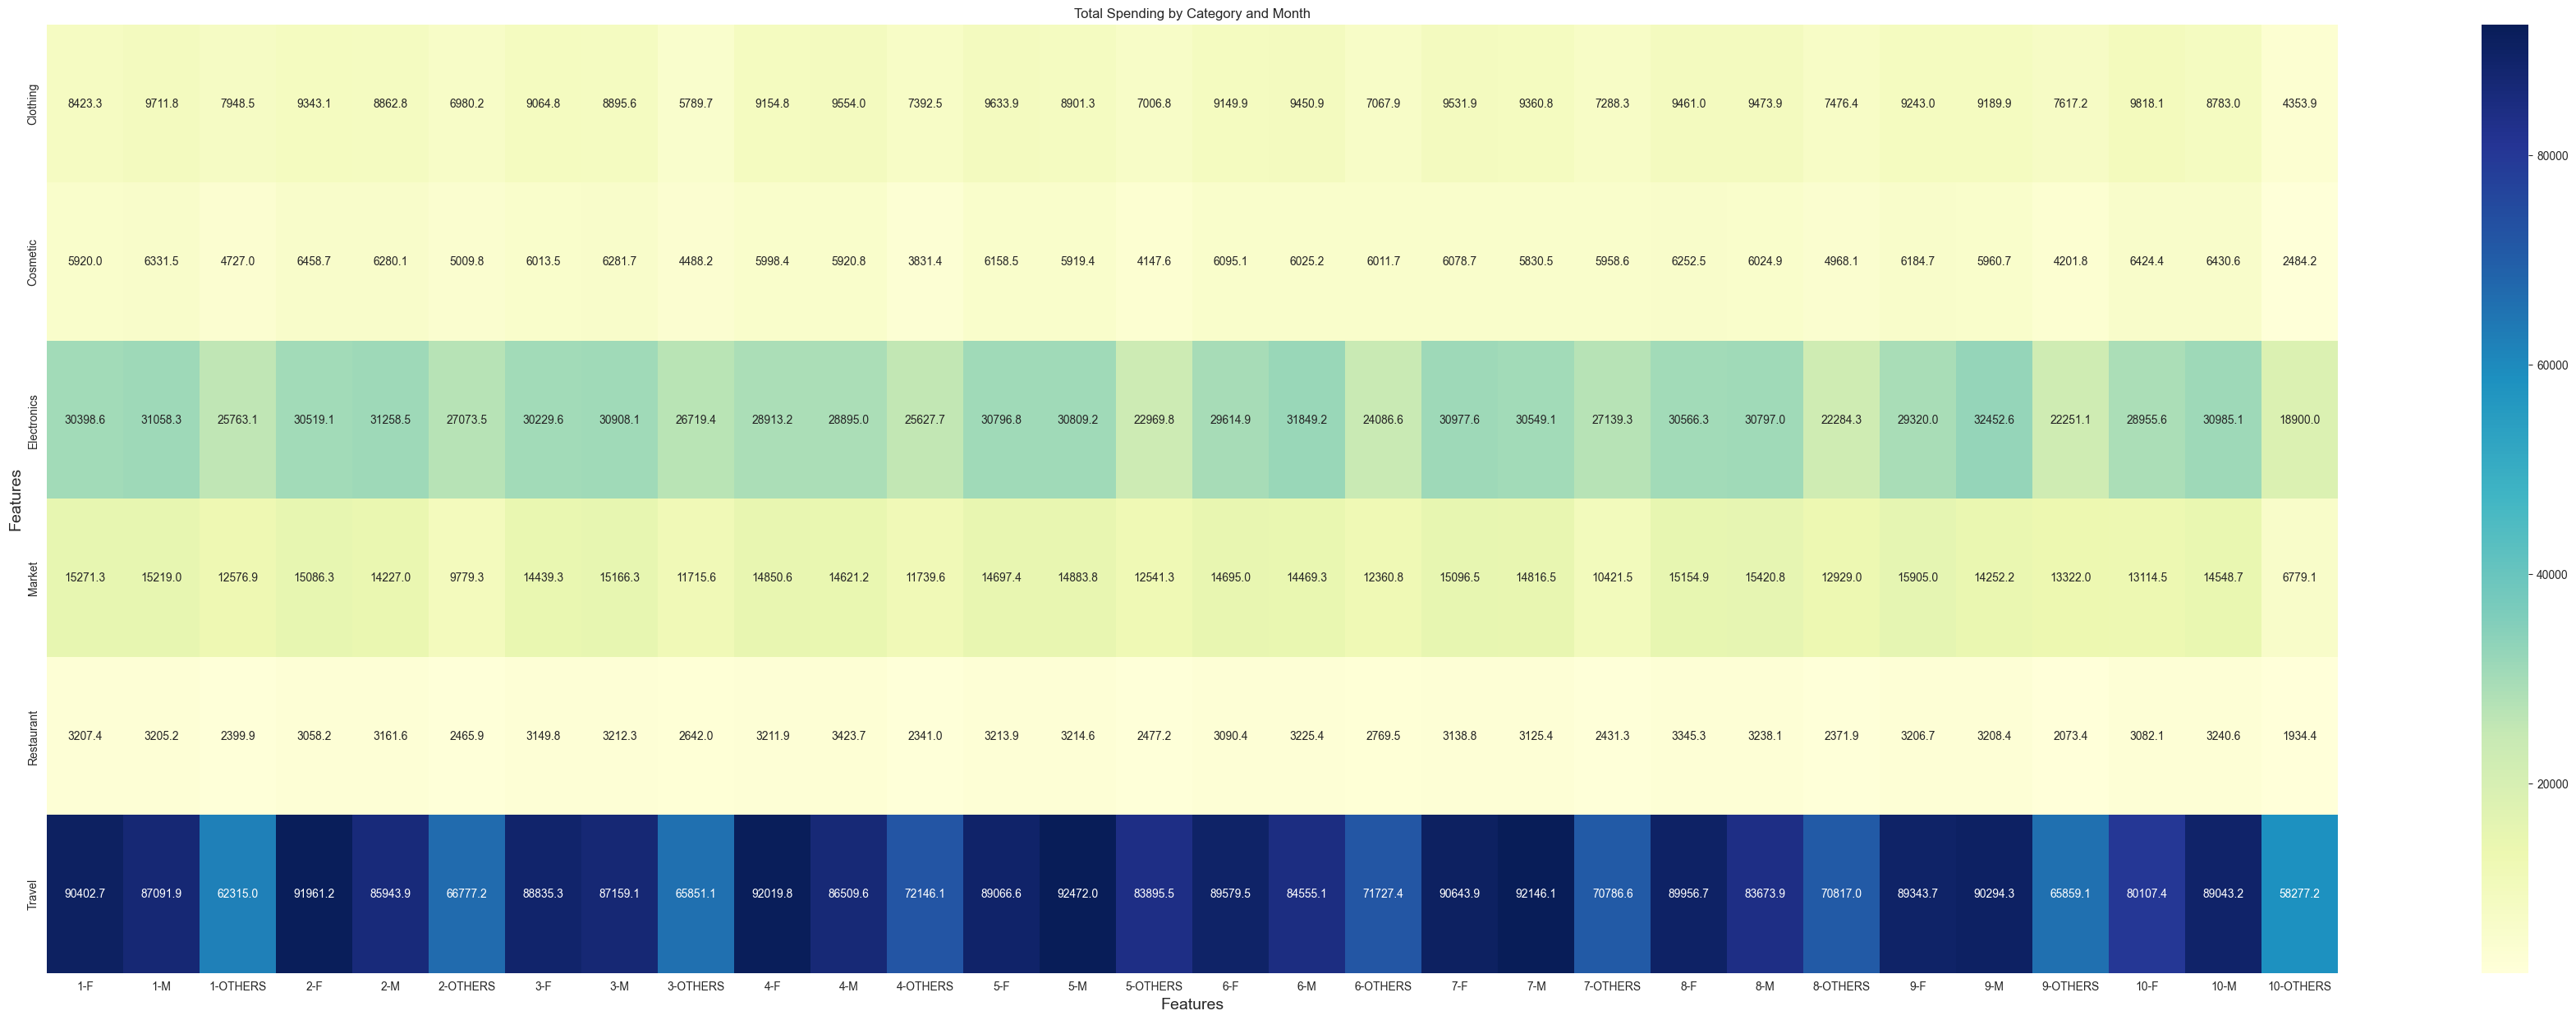

In [53]:
pivot_table = average_spending_by_group.pivot_table(values='Total Amount', index='Category', columns=['Month','Gender'], aggfunc='sum')
plt.figure(figsize=(45, 15))
ax = sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.1f')
ax.set_title('Correlation Heatmap', fontsize=35) 
ax.set_xlabel('Features', fontsize=14) 
ax.set_ylabel('Features', fontsize=14) 
plt.title('Total Spending by Category and Month')
plt.show()

In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

ohe = OneHotEncoder()
preprocessor = ColumnTransformer(
    transformers=[
        ('age', StandardScaler(), ['Age']),  # Apply StandardScaler to 'Age'
        ('cat', OneHotEncoder(), ['Gender', 'Category', 'Month'])  # Apply OneHotEncoder to categorical features
    ],
    remainder='passthrough'  # Leave other columns unchanged
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [55]:
X = average_spending_by_group.drop(columns=['Total Amount'])
Y = average_spending_by_group['Total Amount']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [56]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age', StandardScaler(),
                                                  ['Age']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender', 'Category',
                                                   'Month'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [57]:
y_pred = pipeline.predict(X_test)

In [58]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')

Root Mean Squared Error: 214.9272232803656
Mean Absolute Error: 109.8084023140618
R-squared: 0.8468412012153355
Mean Squared Error: 46193.71130700813


In [59]:
import joblib 
joblib.dump(pipeline, 'expense_forcasting _model.pkl')

['expense_forcasting _model.pkl']

In [70]:
            data = {
                'Gender': ['M', 'M', 'M', 'M', 'M', 'M'],
                'Month': [datetime.today().month, datetime.today().month, datetime.today().month,
                          datetime.today().month, datetime.today().month,
                          datetime.today().month],
                'Category': ['Cosmetic', 'Travel', 'Clothing', 'Electronics', 'Restaurant', 'Market'],
                'Age': [34,34, 34, 34, 34, 34]
            }
            df = pd.DataFrame(data)
            df

,Gender,Month,Category,Age
0,M,7,Cosmetic,34
1,M,7,Travel,34
2,M,7,Clothing,34
3,M,7,Electronics,34
4,M,7,Restaurant,34
5,M,7,Market,34


In [71]:
pipeline.predict(df)

array([  78.43932385, 1695.94939762,  146.39394362,  446.89043627,
         58.56374859,  285.43940093])